In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
stock_data = yf.Ticker("AAPL")
df = stock_data.history(start='2002-01-01', end='2022-12-31')

In [7]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-01-02 00:00:00-05:00,0.334665,0.353637,0.333299,0.353637,529496800,0.0,0.0
2002-01-03 00:00:00-05:00,0.349083,0.360467,0.345593,0.357886,612007200,0.0,0.0
2002-01-04 00:00:00-05:00,0.354244,0.363503,0.348932,0.359556,409976000,0.0,0.0
2002-01-07 00:00:00-05:00,0.360011,0.364261,0.345289,0.347566,444584000,0.0,0.0
2002-01-08 00:00:00-05:00,0.345289,0.349842,0.340887,0.343164,450038400,0.0,0.0


In [8]:
df.reset_index()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-01-02 00:00:00-05:00,0.334665,0.353637,0.333299,0.353637,529496800,0.0,0.0
1,2002-01-03 00:00:00-05:00,0.349083,0.360467,0.345593,0.357886,612007200,0.0,0.0
2,2002-01-04 00:00:00-05:00,0.354244,0.363503,0.348932,0.359556,409976000,0.0,0.0
3,2002-01-07 00:00:00-05:00,0.360011,0.364261,0.345289,0.347566,444584000,0.0,0.0
4,2002-01-08 00:00:00-05:00,0.345289,0.349842,0.340887,0.343164,450038400,0.0,0.0
...,...,...,...,...,...,...,...,...
5282,2022-12-23 00:00:00-05:00,130.539854,132.035499,129.263572,131.477127,63814900,0.0,0.0
5283,2022-12-27 00:00:00-05:00,130.998521,131.028433,128.346242,129.652435,69007800,0.0,0.0
5284,2022-12-28 00:00:00-05:00,129.293476,130.649527,125.504514,125.674019,85438400,0.0,0.0
5285,2022-12-29 00:00:00-05:00,127.618359,130.101127,127.359119,129.233658,75703700,0.0,0.0


In [9]:
df = df.drop(['Dividends', 'Stock Splits'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2002-01-02 00:00:00-05:00,0.334665,0.353637,0.333299,0.353637,529496800
2002-01-03 00:00:00-05:00,0.349083,0.360467,0.345593,0.357886,612007200
2002-01-04 00:00:00-05:00,0.354244,0.363503,0.348932,0.359556,409976000
2002-01-07 00:00:00-05:00,0.360011,0.364261,0.345289,0.347566,444584000
2002-01-08 00:00:00-05:00,0.345289,0.349842,0.340887,0.343164,450038400


In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df.head()

,Open,High,Low,Close,Volume
0,0.334665,0.353637,0.333299,0.353637,529496800
1,0.349083,0.360467,0.345593,0.357886,612007200
2,0.354244,0.363503,0.348932,0.359556,409976000
3,0.360011,0.364261,0.345289,0.347566,444584000
4,0.345289,0.349842,0.340887,0.343164,450038400


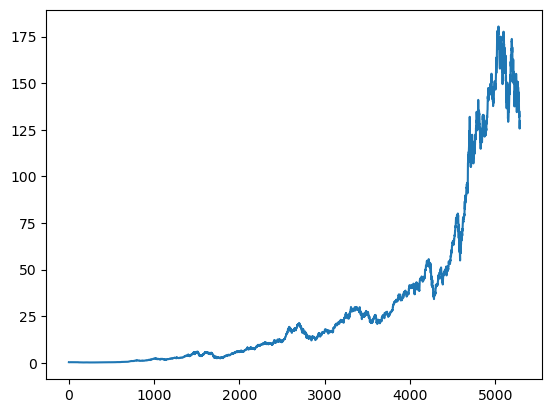

In [12]:
plt.plot(df.Close)

In [13]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5282    149.910410
5283    149.558677
5284    149.169449
5285    148.820595
5286    148.474434
Name: Close, Length: 5287, dtype: float64

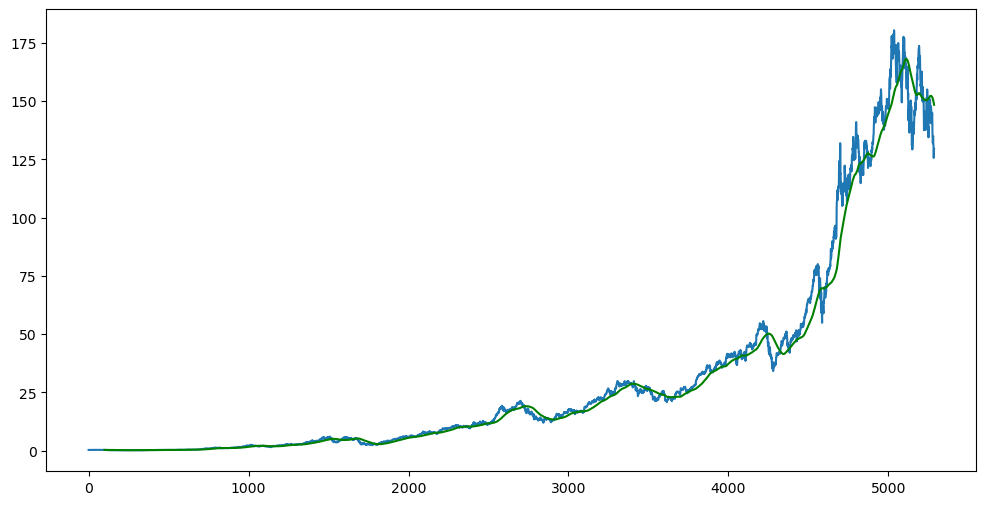

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'g')

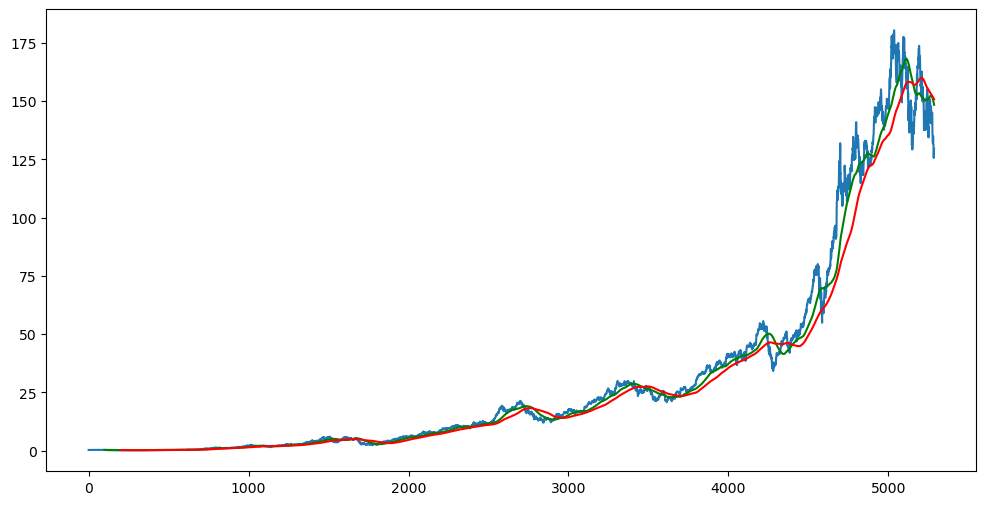

In [15]:
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'g')
plt.plot(ma200, 'r')

In [16]:
df.shape

(5287, 5)

In [17]:
# Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(3700, 1)
(1587, 1)


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00518782],
       [0.0053305 ],
       [0.00538658],
       ...,
       [0.81561537],
       [0.79699058],
       [0.81499211]])

In [20]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
# ML Model

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units = 1))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [25]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
113/113 [==============================] - 21s 156ms/step - loss: 0.0187
Epoch 2/100
113/113 [==============================] - 36s 321ms/step - loss: 0.0059
Epoch 3/100
113/113 [==============================] - 40s 351ms/step - loss: 0.0052
Epoch 4/100
113/113 [==============================] - 40s 351ms/step - loss: 0.0042
Epoch 5/100
113/113 [==============================] - 38s 336ms/step - loss: 0.0043
Epoch 6/100
113/113 [==============================] - 40s 358ms/step - loss: 0.0039
Epoch 7/100
113/113 [==============================] - 40s 350ms/step - loss: 0.0039
Epoch 8/100
113/113 [==============================] - 39s 344ms/step - loss: 0.0040
Epoch 9/100
113/113 [==============================] - 40s 351ms/step - loss: 0.0038
Epoch 10/100
113/113 [==============================] - 38s 340ms/step - loss: 0.0037
Epoch 11/100
113/113 [==============================] - 36s 319ms/step - loss: 0.0034
Epoch 12/100
113/113 [==============================] - 40s 353

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()

,Close
3700,25.054295
3701,25.940878
3702,26.822830
3703,26.671968
3704,26.360964


In [28]:
data_training.tail(100)

,Close
3600,24.314201
3601,24.247663
3602,24.109985
3603,23.942495
3604,22.444225
...,...
3695,24.996267
3696,25.149443
3697,24.490307
3698,23.935612


In [29]:
past_100_days = data_training.tail(100)

In [33]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [34]:
final_df.head()

,Close
0,24.314201
1,24.247663
2,24.109985
3,23.942495
4,22.444225


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02168201],
       [0.02126506],
       [0.02040231],
       ...,
       [0.65684774],
       [0.67915402],
       [0.6811534 ]])

In [36]:
input_data.shape

(1687, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1587, 100, 1)
(1587,)


In [41]:
# Predicting the closing prices

y_predicted = model.predict(x_test)

50/50 [==============================] - 3s 46ms/step


In [42]:
y_predicted.shape

(1587, 1)

In [43]:
y_test

array([0.02631977, 0.03187549, 0.0374022 , ..., 0.65684774, 0.67915402,
       0.6811534 ])

In [44]:
y_predicted

array([[0.06383528],
       [0.06392051],
       [0.06399544],
       ...,
       [0.69778913],
       [0.69033086],
       [0.68363845]], dtype=float32)

In [45]:
scaler.scale_

array([0.00626645])

In [46]:
scale_factor = 1 / scaler.scale_
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

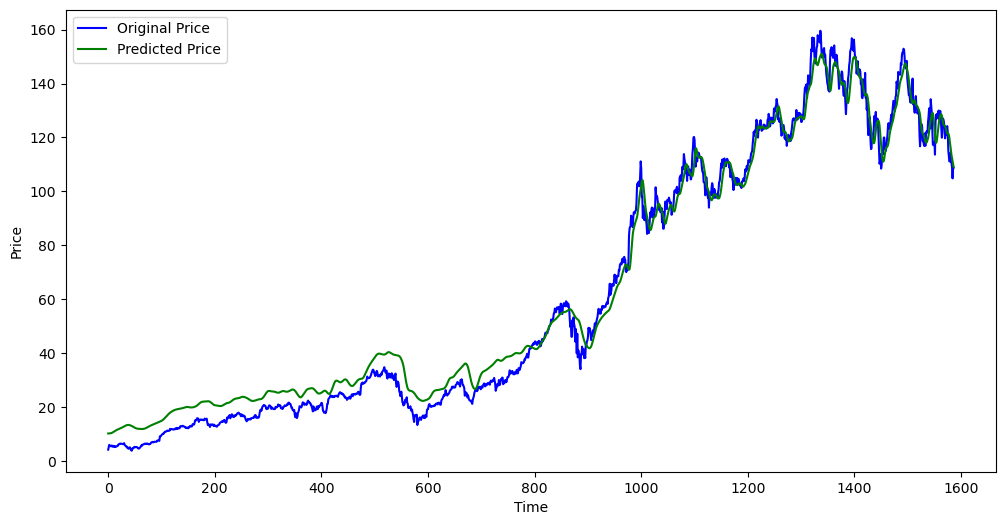

In [49]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'g', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [50]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 8.9/8.9 MB 4.4 MB/s eta 0:00:00
     -------------------------------------- 239.4/239.4 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 471.5/471.5 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 184.3/184.3 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 164.8/164.8 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 21.5/21.5 MB 4.7 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 87.5/87.5 kB 4.8 MB/s eta 0:00:00
  Using cached Pygments-2.15.1-py3-none-any.whl (1.1 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.w

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
